In [1]:
# Exercise 3.1. - load in the files 
import os
import nibabel as nib
import numpy as np

data_dir = "./"  

# Initialize dictionaries to store patient scans and segmentation masks
ct_scans = {}  
segmentation_masks = {} 

# Loop through files in the directory
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith(".nii") or filename.endswith(".nii.gz"):
        file_path = os.path.join(data_dir, filename)

        # Load the NIfTI file
        nii_img = nib.load(file_path)
        img_array = np.array(nii_img.get_fdata(), dtype=np.float32)

        # Identify if it's a scan or a segmentation mask
        if "mask" in filename.lower():
            patient_id = filename.replace("_mask.nii", "").replace(".gz", "")
            segmentation_masks[patient_id] = img_array
        else:
            patient_id = filename.replace(".nii", "").replace(".gz", "")
            ct_scans[patient_id] = img_array

# Print summary
print(f"Loaded {len(ct_scans)} CT scans and {len(segmentation_masks)} segmentation masks.")


Loaded 40 CT scans and 40 segmentation masks.


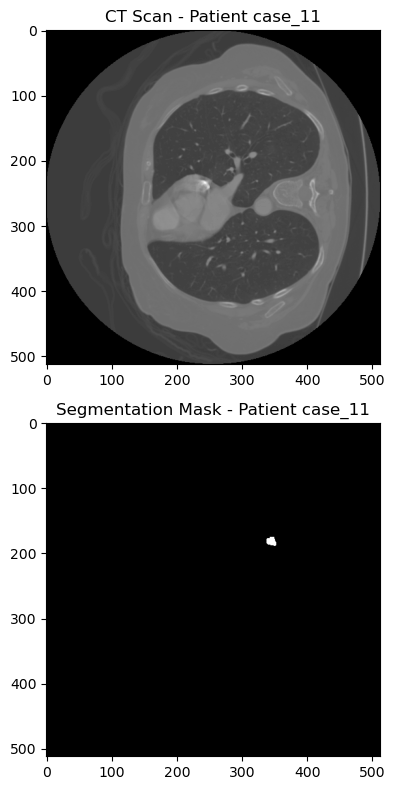

In [2]:
# Exercise 3.1. - displaying a patients CT scan and segmentation mask 
import matplotlib.pyplot as plt

patient_id = list(ct_scans.keys())[3]  # Select a patient

# Select a middle slice for visualization
slice_idx = ct_scans[patient_id].shape[2] // 2  

# Create a figure with 2 rows and 1 column (for vertical stacking)
plt.figure(figsize=(4, 8))  

# Plot CT scan (Top)
plt.subplot(2, 1, 1)  
plt.imshow(ct_scans[patient_id][:, :, slice_idx], cmap="gray")
plt.title(f"CT Scan - Patient {patient_id}")


# Plot Segmentation Mask (Bottom)
plt.subplot(2, 1, 2)  
plt.imshow(segmentation_masks[patient_id][:, :, slice_idx], cmap="gray")
plt.title(f"Segmentation Mask - Patient {patient_id}")


# Save and show
plt.tight_layout()  
plt.savefig("CT_Scan_Segmentation_Mask.png")
plt.show()


In [3]:
# Exercise 3.1 - Find the range of voxels (3D pixels) in which the segmentation exists for each patient
# Loop through all patients to find segmentation ranges
segmentation_ranges = {}

for patient_id, mask in segmentation_masks.items():
    mask_indices = np.where(mask == 1)  # Find non-zero (1) voxel locations

    if mask_indices[0].size == 0:  # If no segmentation is found
        print(f"Patient {patient_id}: No segmentation present.")
        segmentation_ranges[patient_id] = None
        continue

    # Get min and max values along Z, Y, and X axes
    z_min, z_max = mask_indices[0].min(), mask_indices[0].max()
    y_min, y_max = mask_indices[1].min(), mask_indices[1].max()
    x_min, x_max = mask_indices[2].min(), mask_indices[2].max()

    # Store the segmentation range
    segmentation_ranges[patient_id] = {
        "Z": (z_min, z_max),
        "Y": (y_min, y_max),
        "X": (x_min, x_max)
    }

    print(f"Patient {patient_id}:")
    print(f"  - Z range: {z_min} to {z_max}")
    print(f"  - Y range: {y_min} to {y_max}")
    print(f"  - X range: {x_min} to {x_max}")


Patient case_0:
  - Z range: 114 to 123
  - Y range: 277 to 292
  - X range: 99 to 101
Patient case_10:
  - Z range: 317 to 321
  - Y range: 181 to 187
  - X range: 76 to 77
Patient case_11:
  - Z range: 173 to 194
  - Y range: 336 to 358
  - X range: 61 to 66
Patient case_12:
  - Z range: 171 to 177
  - Y range: 247 to 252
  - X range: 185 to 188
Patient case_13:
  - Z range: 154 to 182
  - Y range: 326 to 357
  - X range: 108 to 116
Patient case_14:
  - Z range: 341 to 367
  - Y range: 266 to 292
  - X range: 118 to 125
Patient case_15:
  - Z range: 129 to 191
  - Y range: 243 to 304
  - X range: 85 to 94
Patient case_16:
  - Z range: 353 to 385
  - Y range: 344 to 386
  - X range: 67 to 87
Patient case_17:
  - Z range: 297 to 303
  - Y range: 257 to 263
  - X range: 113 to 114
Patient case_18:
  - Z range: 308 to 316
  - Y range: 331 to 341
  - X range: 96 to 97
Patient case_19:
  - Z range: 375 to 403
  - Y range: 305 to 339
  - X range: 107 to 115
Patient case_1:
  - Z range: 97 t

In [4]:
# Exercise 3.1. - Create a numpy array with a subvolume of the images by increasing 30 voxels in the x and y directions in both senses (min and max) and 5 in the z direction.

subvolumes = {}
subvolume_masks = {}

for patient_id, ct_scan in ct_scans.items():
    seg_mask = segmentation_masks[patient_id]  # Get segmentation mask

    # Find min/max bounds where tumor is located
    coords = np.where(seg_mask > 0)  
    min_x, max_x = coords[0].min(), coords[0].max()
    min_y, max_y = coords[1].min(), coords[1].max()
    min_z, max_z = coords[2].min(), coords[2].max()

    # Expand boundaries
    min_x, max_x = max(min_x - 30, 0), min(max_x + 30, ct_scan.shape[0])
    min_y, max_y = max(min_y - 30, 0), min(max_y + 30, ct_scan.shape[1])
    min_z, max_z = max(min_z - 5, 0), min(max_z + 5, ct_scan.shape[2])

    # Extract subvolume
    subvolumes[patient_id] = ct_scan[min_x:max_x, min_y:max_y, min_z:max_z]
    subvolume_masks[patient_id] = seg_mask[min_x:max_x, min_y:max_y, min_z:max_z]

    # Print shape and coordinates
    shape = subvolumes[patient_id].shape
    print(f"Patient {patient_id}: Subvolume shape = {shape} (x, y, z)")
    print(f"New Coordinates: X [{min_x}, {max_x}], Y [{min_y}, {max_y}], Z [{min_z}, {max_z}]\n")

print(f"Extracted {len(subvolumes)} subvolumes.")


Patient case_0: Subvolume shape = (69, 75, 12) (x, y, z)
New Coordinates: X [84, 153], Y [247, 322], Z [94, 106]

Patient case_1: Subvolume shape = (102, 98, 20) (x, y, z)
New Coordinates: X [67, 169], Y [316, 414], Z [93, 113]

Patient case_10: Subvolume shape = (64, 66, 11) (x, y, z)
New Coordinates: X [287, 351], Y [151, 217], Z [71, 82]

Patient case_11: Subvolume shape = (81, 82, 15) (x, y, z)
New Coordinates: X [143, 224], Y [306, 388], Z [56, 71]

Patient case_12: Subvolume shape = (66, 65, 13) (x, y, z)
New Coordinates: X [141, 207], Y [217, 282], Z [180, 193]

Patient case_13: Subvolume shape = (88, 91, 18) (x, y, z)
New Coordinates: X [124, 212], Y [296, 387], Z [103, 121]

Patient case_14: Subvolume shape = (86, 86, 17) (x, y, z)
New Coordinates: X [311, 397], Y [236, 322], Z [113, 130]

Patient case_15: Subvolume shape = (122, 121, 19) (x, y, z)
New Coordinates: X [99, 221], Y [213, 334], Z [80, 99]

Patient case_16: Subvolume shape = (92, 102, 30) (x, y, z)
New Coordinates

In [5]:
# Exercise 3.1. - Thresholding-based segmentation function

def threshold_segmentation(subvolume, mask):
    tumor_voxels = subvolume[mask > 0]  # Get intensities of segmented region
    min_threshold = np.min(tumor_voxels)
    max_threshold = np.max(tumor_voxels)

    segmented_tumor = (subvolume >= min_threshold) & (subvolume <= max_threshold)
    return segmented_tumor.astype(np.uint8)

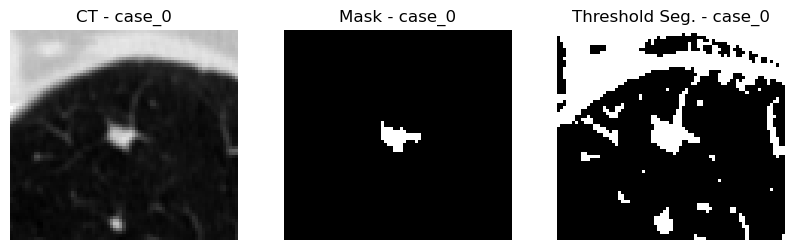

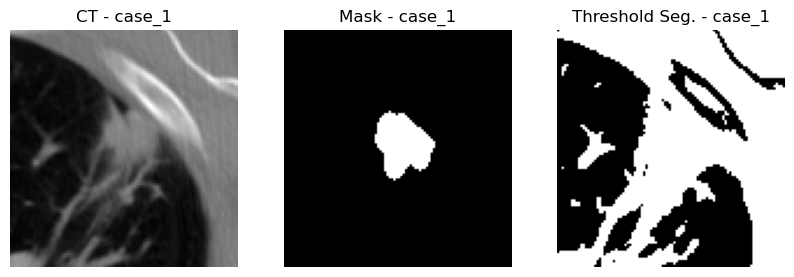

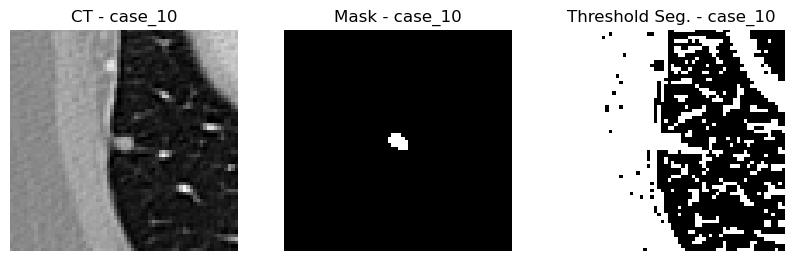

In [6]:
# Exercise 3.1. Apply threshold segmentation & visualize**

for i, patient_id in enumerate(list(subvolumes.keys())[:3]):  # Show first 3 patients
    subvolume = subvolumes[patient_id]  
    segmentation_mask = subvolume_masks[patient_id]  

    # Apply segmentation algorithm
    segmented_tumor = threshold_segmentation(subvolume, segmentation_mask)

    # Display middle slice
    slice_idx = segmented_tumor.shape[2] // 2

    plt.figure(figsize=(10, 4))

    # Original CT scan
    plt.subplot(1, 3, 1)
    plt.imshow(subvolume[:, :, slice_idx], cmap="gray")
    plt.title(f"CT - {patient_id}")
    plt.axis("off")

    # Original segmentation mask
    plt.subplot(1, 3, 2)
    plt.imshow(segmentation_mask[:, :, slice_idx], cmap="gray")
    plt.title(f"Mask - {patient_id}")
    plt.axis("off")

    # Thresholded segmentation result
    plt.subplot(1, 3, 3)
    plt.imshow(segmented_tumor[:, :, slice_idx], cmap="gray")
    plt.title(f"Threshold Seg. - {patient_id}")
    plt.axis("off")

    plt.show()


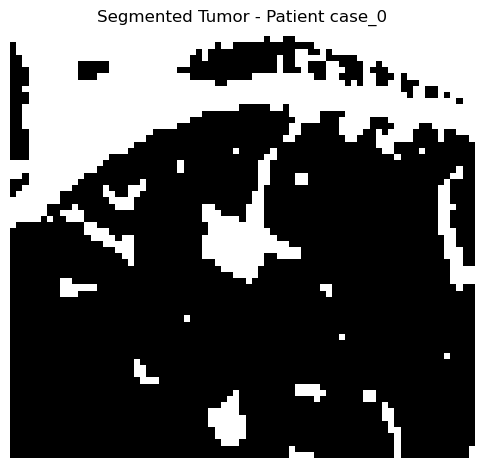

In [8]:
# Display only one threshold segmented image to use in the report:

# Select a specific patient (e.g., first patient)
patient_id = list(subvolumes.keys())[0]  

# Get the subvolume and segmentation mask
subvolume = subvolumes[patient_id]  
segmentation_mask = subvolume_masks[patient_id]  

# Apply threshold segmentation
segmented_tumor = threshold_segmentation(subvolume, segmentation_mask)

# Select the middle slice of the subvolume
slice_idx = segmented_tumor.shape[2] // 2  

# Display only the segmented tumor
plt.figure(figsize=(6, 6))
plt.imshow(segmented_tumor[:, :, slice_idx], cmap="gray")
plt.title(f"Segmented Tumor - Patient {patient_id}")
plt.axis("off")
plt.savefig("Threshold_Segmented_Image")
plt.show()


In [11]:
# Radiomic Features 
import numpy as np

def calculate_features(subvolume, mask, num_bins=32):
    """
    Calculate intensity (sum of squared voxel values), mean absolute deviation, and uniformity.
    
    Parameters:
      subvolume: 3D NumPy array of the CT scan subvolume.
      mask: 3D NumPy array of the segmentation mask (same shape as subvolume).
      num_bins: Number of bins for histogram calculation (default=32).
    
    Returns:
      A tuple (intensity, mean_absolute_deviation, uniformity).
    """
    # Extract voxel intensities where the mask is > 0
    tumour_voxels = subvolume[mask > 0]
    
    if len(tumour_voxels) == 0:
        return (0, 0, 0)  # Avoid errors if no tumour is found

    # 1. Intensity (Sum of Squared Voxels)
    intensity = np.sum(tumour_voxels ** 2)

    # 2. Mean Absolute Deviation (MAD)
    mean_intensity = np.mean(tumour_voxels)
    mean_absolute_deviation = np.mean(np.abs(tumour_voxels - mean_intensity))

    # 3. Uniformity (Histogram-based feature)
    min_intensity, max_intensity = tumour_voxels.min(), tumour_voxels.max()
    
    # Dynamically adjust bin count (avoiding too many bins for small datasets)
    num_bins = min(num_bins, max(5, len(np.unique(tumour_voxels)) // 2))
    
    hist, _ = np.histogram(tumour_voxels, bins=num_bins, range=(min_intensity, max_intensity), density=True)
    uniformity = np.sum(hist ** 2)  # Squared sum of probabilities

    return intensity, mean_absolute_deviation, uniformity


In [12]:
# Calculate the radiomic features 
# Dictionary to store extracted features
patient_features = {}

for patient_id in subvolumes.keys():
    subvolume = subvolumes[patient_id]  # Extract patient's subvolume
    segmentation_mask = subvolume_masks[patient_id]  # Corresponding segmentation mask

    # Compute features
    intensity, mad, uniformity = calculate_features(subvolume, segmentation_mask)

    # Store results
    patient_features[patient_id] = {
        "Intensity": intensity,
        "MAD": mad,
        "Uniformity": uniformity
    }

# Print results for all patients
for patient_id, features in patient_features.items():
    print(f"Patient {patient_id}: Intensity={features['Intensity']:.2f}, "
          f"MAD={features['MAD']:.2f}, Uniformity={features['Uniformity']:.4f}")


Patient case_0: Intensity=27673732.00, MAD=189.50, Uniformity=0.0001
Patient case_1: Intensity=57513796.00, MAD=106.04, Uniformity=0.0001
Patient case_10: Intensity=6673689.00, MAD=274.03, Uniformity=0.0000
Patient case_11: Intensity=965718912.00, MAD=47.67, Uniformity=0.0004
Patient case_12: Intensity=2368756.00, MAD=118.83, Uniformity=0.0002
Patient case_13: Intensity=182834816.00, MAD=203.77, Uniformity=0.0001
Patient case_14: Intensity=168770784.00, MAD=165.20, Uniformity=0.0002
Patient case_15: Intensity=226613536.00, MAD=161.47, Uniformity=0.0000
Patient case_16: Intensity=210292128.00, MAD=140.45, Uniformity=0.0001
Patient case_17: Intensity=8671432.00, MAD=391.40, Uniformity=0.0000
Patient case_18: Intensity=22688284.00, MAD=332.64, Uniformity=0.0000
Patient case_19: Intensity=325362112.00, MAD=204.06, Uniformity=0.0001
Patient case_2: Intensity=10559604.00, MAD=30.29, Uniformity=0.0006
Patient case_20: Intensity=43936600.00, MAD=271.02, Uniformity=0.0000
Patient case_21: Inten